# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


/var/folders/91/dggs7d9x7gqf_kcxkqwh61mr0000gn/T/ipykernel_45562/911988960.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'], dayfirst=True)


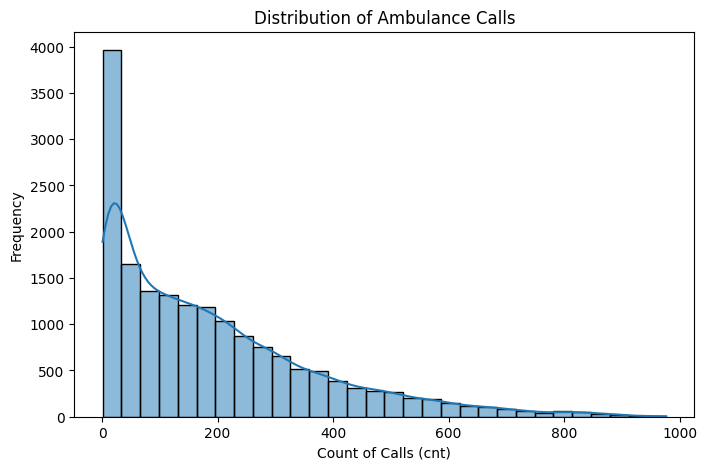

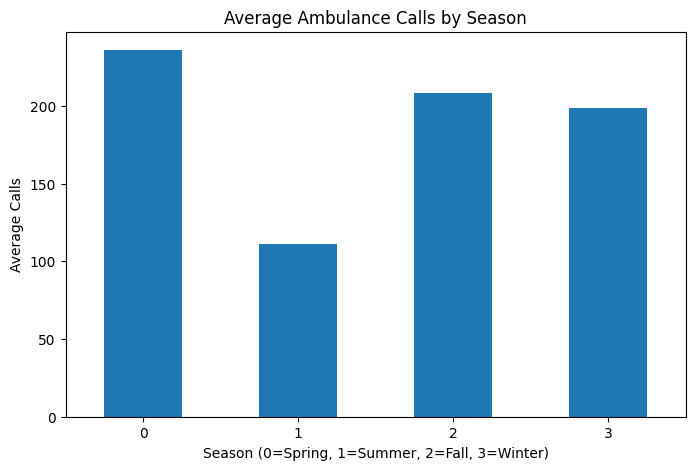

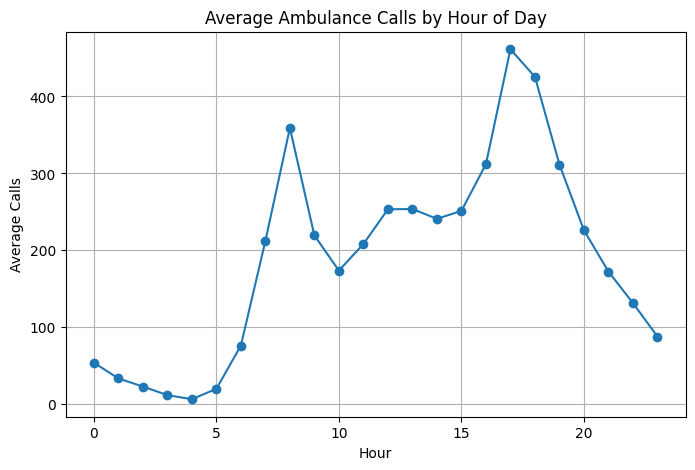

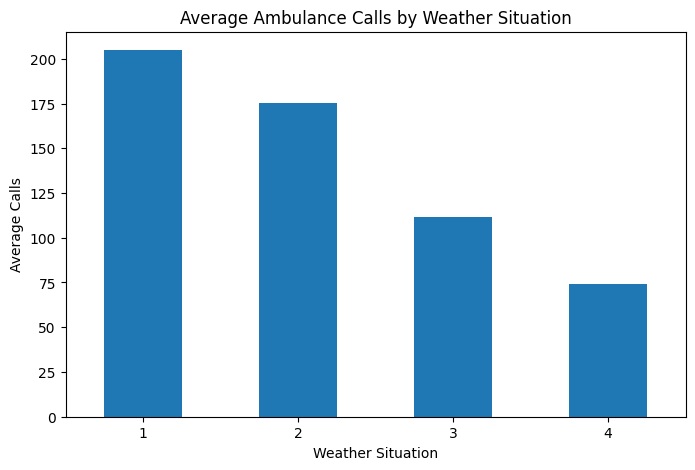

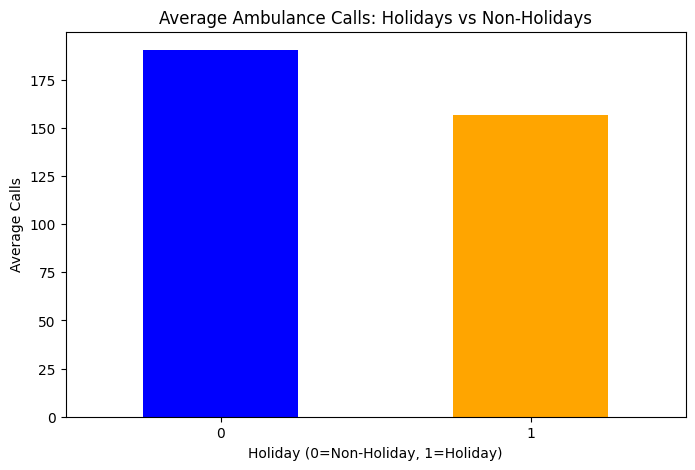

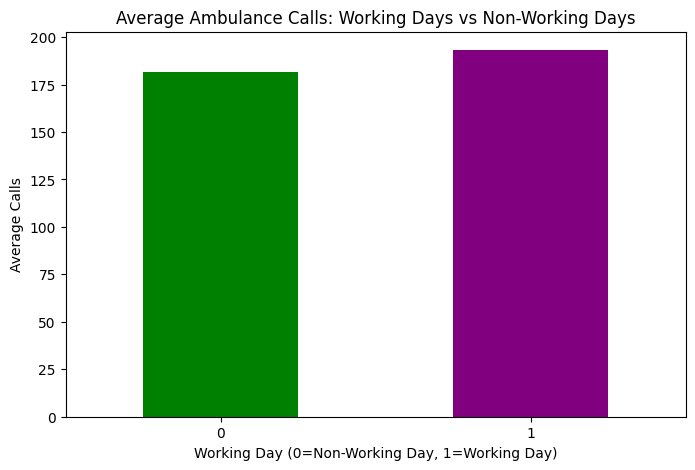

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv('/Users/misha/Desktop/Ad-labs-2024/lab-7/motorbike_ambulance_calls.csv')


data['date'] = pd.to_datetime(data['date'], dayfirst=True)
data['season'] = data['season'].astype('category').cat.codes


plt.figure(figsize=(8, 5))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title("Distribution of Ambulance Calls")
plt.xlabel("Count of Calls (cnt)")
plt.ylabel("Frequency")
plt.show()


seasonal_calls = data.groupby('season')['cnt'].mean()
plt.figure(figsize=(8, 5))
seasonal_calls.plot(kind='bar', rot=0)
plt.title("Average Ambulance Calls by Season")
plt.xlabel("Season (0=Spring, 1=Summer, 2=Fall, 3=Winter)")
plt.ylabel("Average Calls")
plt.show()


hourly_calls = data.groupby('hr')['cnt'].mean()
plt.figure(figsize=(8, 5))
hourly_calls.plot(kind='line', marker='o')
plt.title("Average Ambulance Calls by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Calls")
plt.grid()
plt.show()


weather_calls = data.groupby('weathersit')['cnt'].mean()
plt.figure(figsize=(8, 5))
weather_calls.plot(kind='bar', rot=0)
plt.title("Average Ambulance Calls by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Average Calls")
plt.show()


holiday_effect = data.groupby('holiday')['cnt'].mean()
workingday_effect = data.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(8, 5))
holiday_effect.plot(kind='bar', rot=0, color=['blue', 'orange'])
plt.title("Average Ambulance Calls: Holidays vs Non-Holidays")
plt.xlabel("Holiday (0=Non-Holiday, 1=Holiday)")
plt.ylabel("Average Calls")
plt.show()

plt.figure(figsize=(8, 5))
workingday_effect.plot(kind='bar', rot=0, color=['green', 'purple'])
plt.title("Average Ambulance Calls: Working Days vs Non-Working Days")
plt.xlabel("Working Day (0=Non-Working Day, 1=Working Day)")
plt.ylabel("Average Calls")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


               Model         MAE        RMSE        R²
0      Random Forest   24.906196   42.128380  0.943951
1  Linear Regression  104.266161  138.363279  0.395416


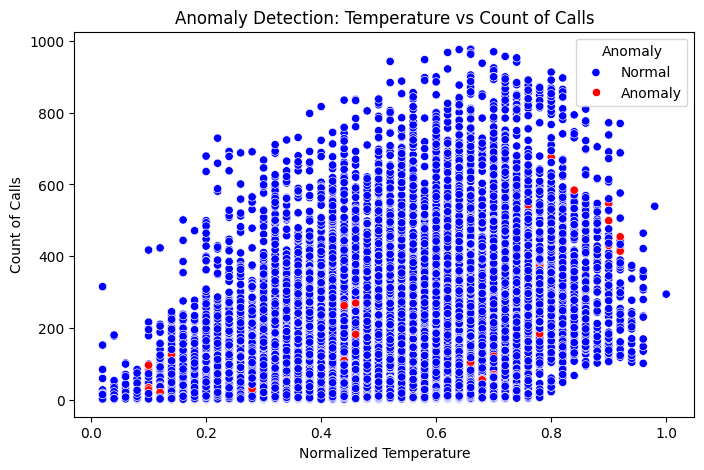

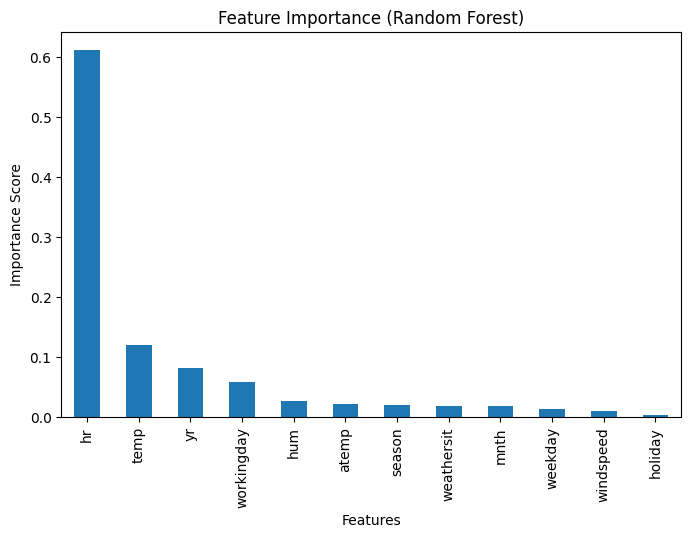

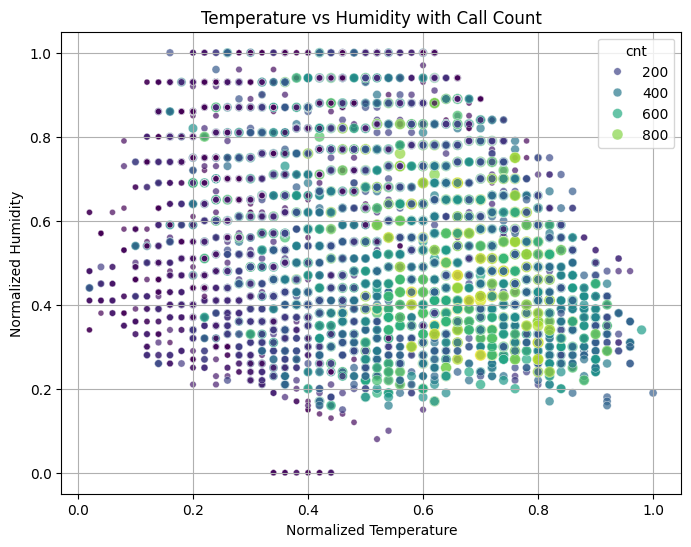

In [9]:
X = data.drop(columns=['cnt', 'date', 'index'])
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)


model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression'],
    'MAE': [mae_rf, mae_lr],
    'RMSE': [rmse_rf, rmse_lr],
    'R²': [r2_rf, r2_lr]
})
print(model_comparison)

anomaly_detector = IsolationForest(random_state=42, contamination=0.01)
data['anomaly'] = anomaly_detector.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='temp', y='cnt', hue='anomaly', palette={1: 'blue', -1: 'red'})
plt.title("Anomaly Detection: Temperature vs Count of Calls")
plt.xlabel("Normalized Temperature")
plt.ylabel("Count of Calls")
plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
plt.show()


feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
feature_importances.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='temp', y='hum', size='cnt', hue='cnt', palette="viridis", alpha=0.7)
plt.title("Temperature vs Humidity with Call Count")
plt.xlabel("Normalized Temperature")
plt.ylabel("Normalized Humidity")
plt.grid()
plt.show()

**Аналіз роботи**:
1. Ця лаб.робота досліджує залежність викликів швидкої допомоги від сезонних, часових та погодних факторів, використовуючи детальний аналіз даних (EDA) і побудову прогнозних моделей.
2. Було виявлено, що кількість викликів варіюється залежно від часу доби, сезону та погодних умов, зокрема ясна погода і вечірній час сприяють підвищенню кількості викликів. 
3. Для прогнозування використано моделі Random Forest і Linear Regression, де Random Forest показав кращу точність R²=0.94. Виявлення аномалій через Isolation Forest дозволило визначити нетипові випадки, які можуть бути пов'язані з екстремальними погодними умовами чи подіями.
4. Важливість ознак та комбінаційний аналіз "температура і вологість" показали основні фактори, що впливають на виклики, а рекомендації щодо використання часових рядів пропонують подальше вдосконалення моделювання.
5. Дякую)





